# Preprocess

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import gym

import os
import datetime
import pickle
import shutil

import imageio
import cv2

import argparse
import random

from collections import deque
from IPython.core.debugger import set_trace

In [2]:
env = gym.make("Breakout-v0")

In [67]:
class FrameStack:
    def __init__(self, WRAPPER_SIZE = 4 ):
        self.WRAPPER_SIZE = WRAPPER_SIZE
        self.s = deque([],maxlen = WRAPPER_SIZE) #wrapper how many frame together
        
    def __call__(self,ob):
        gray = cv2.cvtColor(ob,cv2.COLOR_BGR2GRAY)
        self.s.append(cv2.resize(gray,(84,84),cv2.INTER_AREA))

    def __len__(self):
        return len(self.s)
    
    @property
    def array(self):
        if len(self.s) < self.WRAPPER_SIZE:
            return print("Wrapper too small, unpackable")
        return np.expand_dims(np.dstack(self.s),0)

In [68]:
ob = env.reset()
ob,reward,done,infor = env.step(1)
state=FrameStack()
for i in range(4):
    ob,reward,done,infor = env.step(env.action_space.sample())
    state(ob)
    print(len(state),i)
    


1 0
2 1
3 2
4 3


(84, 84)
(84, 84)
(84, 84)
(84, 84)


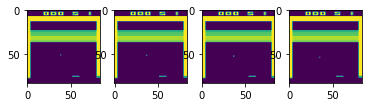

In [69]:
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(state.s[i])
    print(state.s[i].shape)
plt.show()

In [71]:
print(state.array.shape)

(1, 84, 84, 4)


# Test for class setting

(210, 160)
(110, 84)
(84, 84)


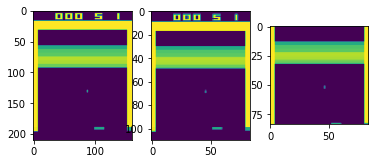

In [42]:
ob_gray=cv2.cvtColor(ob,cv2.COLOR_BGR2GRAY)
print(ob_gray.shape)
ob_sample = cv2.resize(ob_gray,(84,110),cv2.INTER_NEAREST)
print(ob_sample.shape)
ob_crop = ob_sample[16:100,:]
print(ob_crop.shape)
plt.subplot(131)
plt.imshow(ob_gray)
plt.subplot(132)
plt.imshow(ob_sample)
plt.subplot(133)
plt.imshow(ob_crop)
plt.show()

In [58]:
reward = np.linspace(-4,4,300)
cc = np.piecewise(reward,[reward<-1,(reward>=-1)&(reward<1),reward>=1],[-1,lambda reward: reward,1])

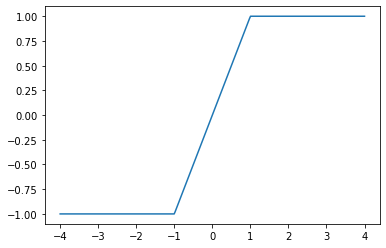

300 300


In [60]:
plt.plot(reward,cc)
plt.show()
print(len(reward),len(cc))

In [61]:
print(abs(-10))

10
